In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection,metrics,svm
from sklearn.feature_extraction.text import TfidfVectorizer
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle


In [2]:
dataSet = pd.read_csv('./dataset.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])
dataSet

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
dataSet = dataSet.sample(frac=1)
dataSet = dataSet[:400000]

In [4]:
dataSet['polarity'] = dataSet['polarity'].replace(4,1)
dataSet.head()

,polarity,id,date,query,user,text
22635,0,1557533664,Sun Apr 19 04:41:12 PDT 2009,NO_QUERY,Tatterededges,My Macbook has had ALL the problems associated...
13708,0,1553364154,Sat Apr 18 14:04:07 PDT 2009,NO_QUERY,zomgitsamanda,@MrsKellyBelly I haven't paid it off. I just ...
751048,0,2285901284,Mon Jun 22 15:44:02 PDT 2009,NO_QUERY,StephanBarnem,Listening to Radio Amnesia live from Ibiza wit...
859520,1,1676098658,Fri May 01 21:05:41 PDT 2009,NO_QUERY,dolphintrainer1,@_alover_ yes i did! it was good
513425,0,2190383086,Tue Jun 16 02:34:16 PDT 2009,NO_QUERY,MonaDeFleur,Gah this is fuuuucking ridiculous I just need...


In [5]:
dataSet.describe()

,polarity,id
count,400000.000000,4.000000e+05
mean,0.500585,1.998952e+09
std,0.500000,1.935786e+08
min,0.000000,1.467812e+09
25%,0.000000,1.956996e+09
50%,1.000000,2.002190e+09
75%,1.000000,2.177047e+09
max,1.000000,2.329206e+09


In [6]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 22635 to 358983
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   polarity  400000 non-null  int64 
 1   id        400000 non-null  int64 
 2   date      400000 non-null  object
 3   query     400000 non-null  object
 4   user      400000 non-null  object
 5   text      400000 non-null  object
dtypes: int64(2), object(4)
memory usage: 21.4+ MB


In [7]:
# check the number of positive vs. negative tagged sentences
positives = dataSet['polarity'][dataSet.polarity == 1 ]
negatives = dataSet['polarity'][dataSet.polarity == 0 ]

print('Total length of the data is:         {}'.format(dataSet.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         400000
No. of positve tagged sentences is:  200234
No. of negative tagged sentences is: 199766


In [8]:
# get a word count per of text
def word_count(words):
    return len(words.split())

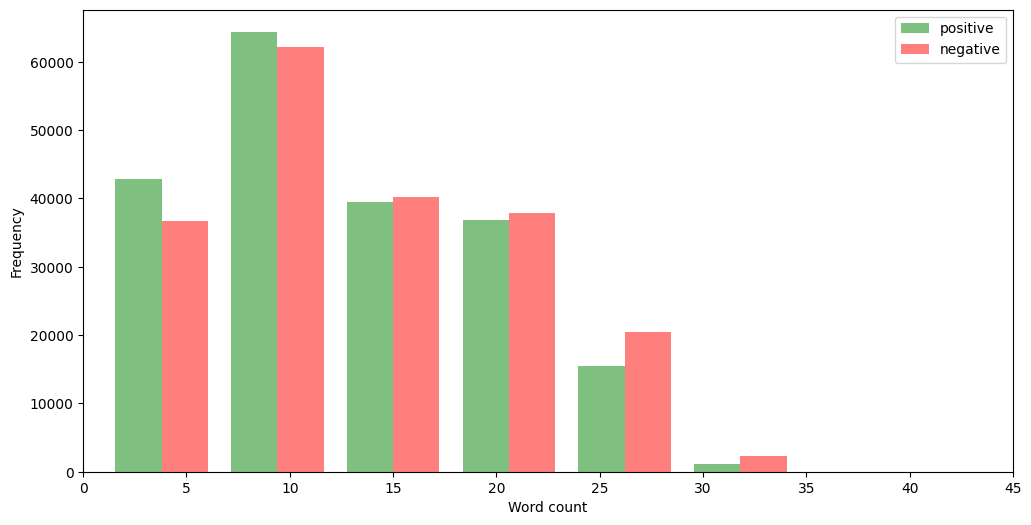

In [9]:
# plot word count distribution for both positive and negative 

dataSet['word count'] = dataSet['text'].apply(word_count)
p = dataSet['word count'][dataSet.polarity == 1]
n = dataSet['word count'][dataSet.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [10]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(dataSet['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 129582),
 ('and', 73990),
 ('you', 59093),
 ('for', 53073),
 ('have', 36116),
 ('that', 32406),
 ("i'm", 31995),
 ('just', 31101),
 ('but', 30800),
 ('with', 28284),
 ('not', 25680),
 ('was', 25395),
 ('this', 22051),
 ('get', 20190),
 ('good', 19419),
 ('are', 18963),
 ('like', 18762),
 ('all', 18510),
 ('out', 17115),
 ('your', 16216)]

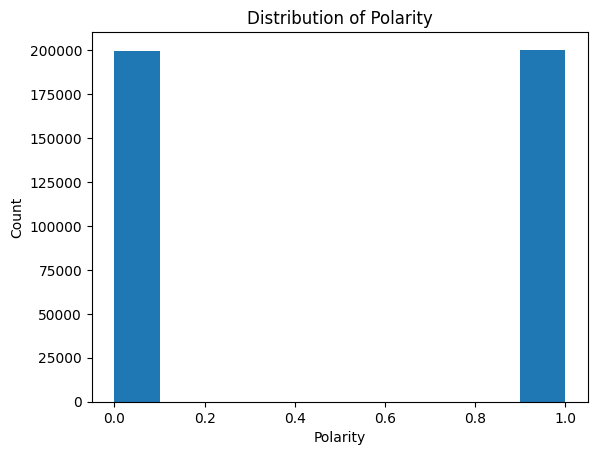

In [11]:
plt.hist(dataSet['polarity'])
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Distribution of Polarity')
plt.show()

In [12]:
# Removing the unnecessary columns.
dataSet.drop(['date','query','user','word count'], axis=1, inplace=True)

In [13]:
dataSet.drop('id', axis=1, inplace=True)

In [14]:
dataSet

,polarity,text
22635,0,My Macbook has had ALL the problems associated...
13708,0,@MrsKellyBelly I haven't paid it off. I just ...
751048,0,Listening to Radio Amnesia live from Ibiza wit...
859520,1,@_alover_ yes i did! it was good
513425,0,Gah this is fuuuucking ridiculous I just need...
...,...,...
375128,0,@KhloeKardashian I have been calling for the ...
1253230,1,"had a lovely day at the shops, eating raspberr..."
1182687,1,"@IsaacSTK heyyy yea i cant wait for summer, r..."
577725,0,@pantherpaws02 I hate you guys haha just kidd...


In [15]:
#Checking if any null values present
(dataSet.isnull().sum() / len(dataSet))*100

polarity    0.0
text        0.0
dtype: float64

In [16]:
#convrting pandas object to a string type
dataSet['text'] = dataSet['text'].astype('str')

In [17]:
nltk.download('stopwords')
stoPword = set(stopwords.words('english'))
print(stoPword)
nltk.download('punkt')
nltk.download('wordnet')

{'before', 'were', "mustn't", 'weren', 'in', 'nor', 'me', 'so', 'had', "hasn't", 'be', 'o', 'ours', 'same', 'himself', 'being', 'having', "should've", 'shouldn', 'your', 'where', 'but', "isn't", 'because', 'ma', 'an', 'again', 'wouldn', 'does', 'mustn', 'only', 'll', 'needn', 'on', 'those', 'through', 'no', "shan't", "shouldn't", 'couldn', 'that', 'down', 'few', 'below', 'whom', 'was', 'what', 'and', 'did', 'of', 'you', "she's", "it's", 'against', 'between', 'now', 'been', 'when', "wouldn't", 'they', 'such', 'm', 're', 'or', 'with', 'under', 'didn', 'is', 'not', 'the', 'wasn', 'am', 'why', 'other', 'up', "haven't", 'we', 'than', 'doesn', "couldn't", 'which', "won't", "you'd", 'do', 'our', 'this', 'then', 'very', 've', 'to', 'above', 'out', "weren't", 'itself', 'during', 'a', 'own', 'from', "needn't", 'theirs', 'i', 'too', 'after', 'myself', "hadn't", "doesn't", 'have', 's', 'hers', 'all', 'here', 'themselves', 'any', 'my', 'as', 'there', "that'll", 'further', 't', 'her', 'once', 'shoul

[nltk_data] Downloading package stopwords to C:\Users\Hany
[nltk_data]     Medhat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Hany
[nltk_data]     Medhat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Hany
[nltk_data]     Medhat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

The Preprocessing steps taken are:

Lower Casing: Each text is converted to lowercase.
Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

Removing Short Words: Words with length less than 2 are removed.
Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [18]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stoPword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [19]:
dataSet['processed_tweets'] = dataSet['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [20]:
dataSet.head(10)

,polarity,text,processed_tweets
22635,0,My Macbook has had ALL the problems associated...,macbook problem associated macbooks flickering...
13708,0,@MrsKellyBelly I haven't paid it off. I just ...,mrskellybelly havent paid cut husband would qu...
751048,0,Listening to Radio Amnesia live from Ibiza wit...,istening radio amnesia live ibiza richies set ...
859520,1,@_alover_ yes i did! it was good,alover yes good
513425,0,Gah this is fuuuucking ridiculous I just need...,ah fuuuucking ridiculous need bloody doctor te...
925383,1,"At home, gonna spend some much needed time wit...",home gon na spend much needed time mother
173181,0,"@lil_kimmeh Me too, I miss it. I, however, wi...",lilkimmeh miss however humpthestump rest life
1480878,1,"@anjlishah alright sounds nice, well enjoy and...",anjlishah alright sound nice well enjoy ill ta...
1496199,1,I think we have cute mormon boys..just those t...,think cute mormon boysjust two though 23
90020,0,Have to do like the entire final draft of my H...,ave like entire final draft history paper lame


Word-Cloud for Positive tweets.

Vectorization and Splitting the data 

Storing input variable-processes_tweets to X and output variable-polarity to y

In [21]:
x = dataSet['processed_tweets'].values
y = dataSet['polarity'].values

In [22]:
x.shape , y.shape 

((400000,), (400000,))

Convert text to word frequency vectors

TF-IDF

This is an acronym than stands for Term Frequency – Inverse Document Frequency which are the components of the resulting scores assigned to each word.

Term Frequency: This summarizes how often a given word appears within a document.
Inverse Document Frequency: This downscales words that appear a lot across documents.

In [23]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
x = vector.fit_transform(x)


In [24]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=.3,random_state=42)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((280000, 284002), (120000, 284002), (280000,), (120000,))

In [26]:
svmC=svm.SVC(kernel='linear')
svmC.fit(x_train,y_train)

SVC(kernel='linear')

In [27]:
y_pred=svmC.predict(x_test)

In [28]:
metrics.accuracy_score(y_test,y_pred)

0.7735833333333333

In [29]:
file = open('SVM.pickle','wb')
pickle.dump(svmC, file)
file.close()